In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

sns.set(style="whitegrid")


In [2]:
df = pd.read_csv("../data/Mall_Customers.csv")

df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

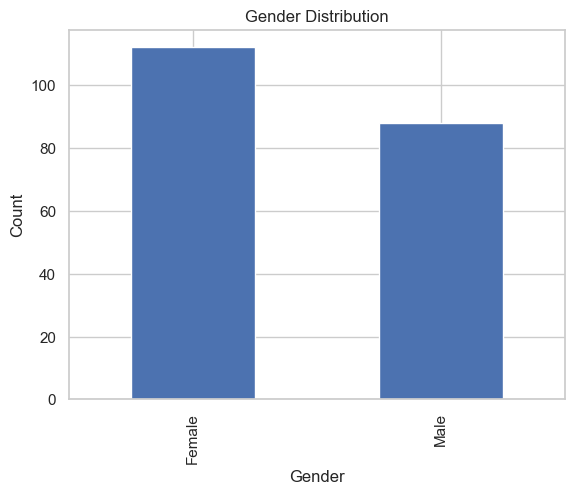

In [21]:
plt.figure()
df['Gender'].value_counts().plot(kind='bar')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.savefig("../images/gender_distribution.png", dpi=150, bbox_inches='tight')
plt.show()


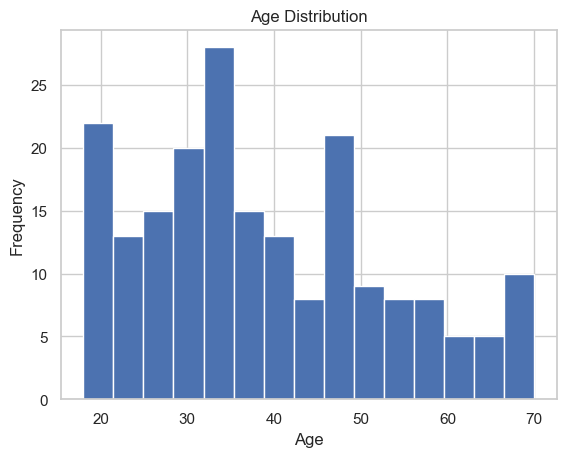

In [22]:
plt.figure()
plt.hist(df['Age'], bins=15)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.savefig("../images/age_distribution.png", dpi=150, bbox_inches='tight')
plt.show()


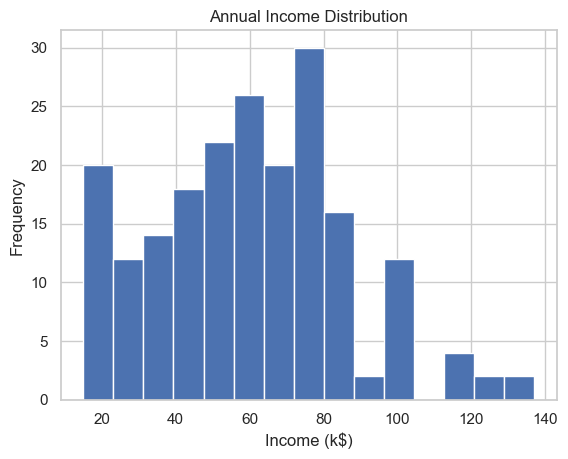

In [23]:
plt.figure()
plt.hist(df['Annual Income (k$)'], bins=15)
plt.title("Annual Income Distribution")
plt.xlabel("Income (k$)")
plt.ylabel("Frequency")
plt.savefig("../images/income_distribution.png", dpi=150, bbox_inches='tight')
plt.show()


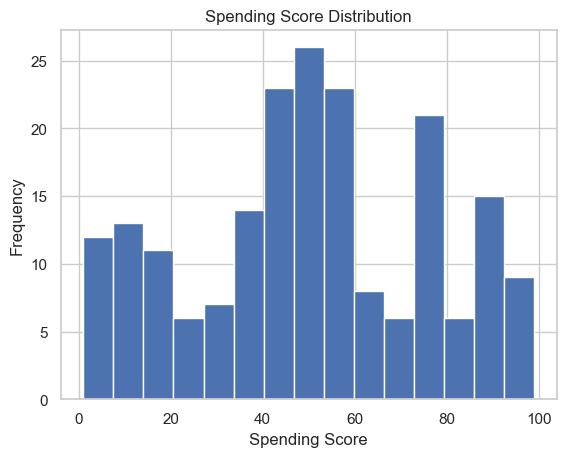

In [24]:
plt.figure()
plt.hist(df['Spending Score (1-100)'], bins=15)
plt.title("Spending Score Distribution")
plt.xlabel("Spending Score")
plt.ylabel("Frequency")
plt.savefig("../images/spending_distribution.png", dpi=150, bbox_inches='tight')
plt.show()


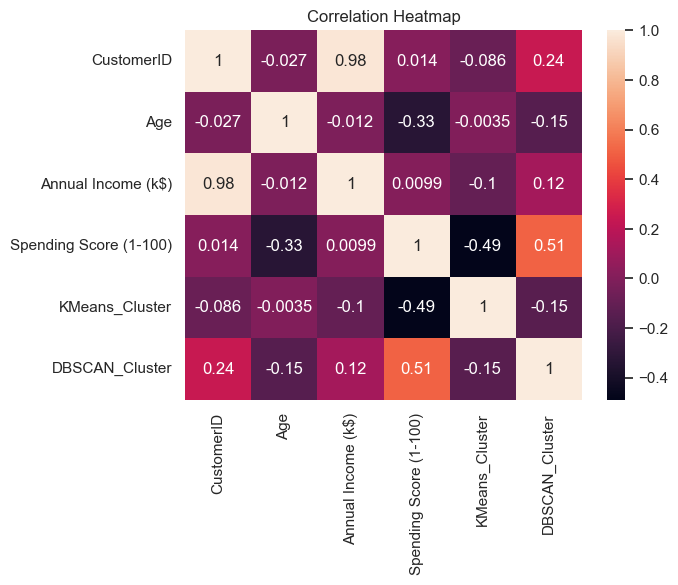

In [25]:
plt.figure()
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Correlation Heatmap")
plt.savefig("../images/correlation_heatmap.png", dpi=150, bbox_inches='tight')
plt.show()


In [10]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


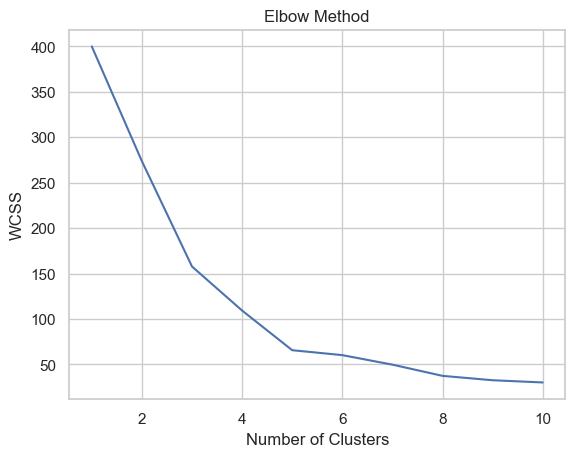

In [26]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.savefig("../images/elbow_method.png", dpi=150, bbox_inches='tight')
plt.show()


In [13]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

df['KMeans_Cluster'] = kmeans_labels


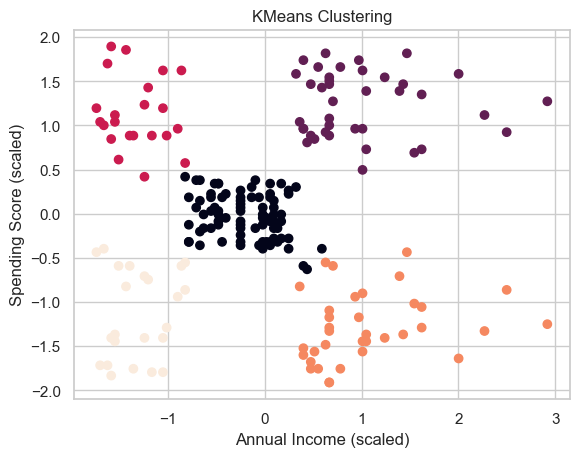

In [27]:
plt.figure()
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels)
plt.title("KMeans Clustering")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.savefig("../images/kmeans_clustering.png", dpi=150, bbox_inches='tight')
plt.show()


In [15]:
kmeans_score = silhouette_score(X_scaled, kmeans_labels)
print("KMeans Silhouette Score:", kmeans_score)


KMeans Silhouette Score: 0.5546571631111091


In [16]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

df['DBSCAN_Cluster'] = dbscan_labels


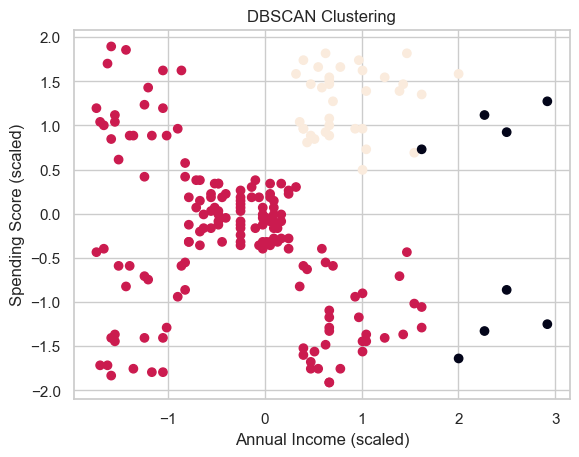

In [28]:
plt.figure()
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels)
plt.title("DBSCAN Clustering")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.savefig("../images/dbscan_clustering.png", dpi=150, bbox_inches='tight')
plt.show()


In [18]:
# Remove noise points (-1) for silhouette calculation
mask = dbscan_labels != -1

if len(set(dbscan_labels[mask])) > 1:
    dbscan_score = silhouette_score(X_scaled[mask], dbscan_labels[mask])
    print("DBSCAN Silhouette Score:", dbscan_score)
else:
    print("DBSCAN did not form valid clusters for silhouette score.")


DBSCAN Silhouette Score: 0.3875583892728279


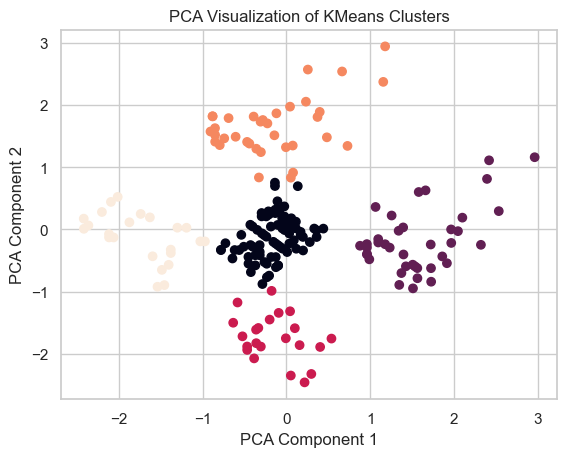

In [29]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels)
plt.title("PCA Visualization of KMeans Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.savefig("../images/pca_visualization.png", dpi=150, bbox_inches='tight')
plt.show()


In [20]:
df.groupby('KMeans_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
KMeans_Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043
